In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report 
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier

pd.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv("U.S._Chronic_Disease_Indicators.csv")

## Data Analysis

In [3]:
df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,DataValueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,StratificationCategory3,Stratification3,Geolocation,LocationID,TopicID,QuestionID,ResponseID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2020,2020,US,United States,BRFSS,Health Status,Recent activity limitation among adults,NaN,Number,Age-adjusted Mean,2.9,2.9,NaN,NaN,2.8,2.9,Sex,Female,NaN,NaN,NaN,NaN,NaN,59,HEA,HEA04,NaN,AGEADJMEAN,SEX,SEXF,NaN,NaN,NaN,NaN
1,2015,2019,AR,Arkansas,US Cancer DVT,Cancer,"Invasive cancer (all sites combined), incidence",NaN,Number,Number,9537.0,9537.0,NaN,NaN,NaN,NaN,Sex,Male,NaN,NaN,NaN,NaN,POINT (-92.27449074299966 34.74865012400045),5,CAN,CAN07,NaN,NMBR,SEX,SEXM,NaN,NaN,NaN,NaN
2,2015,2019,CA,California,US Cancer DVT,Cancer,"Cervical cancer mortality among all females, u...",NaN,Number,Number,486.0,486.0,NaN,NaN,NaN,NaN,Overall,Overall,NaN,NaN,NaN,NaN,POINT (-120.99999953799971 37.63864012300047),6,CAN,CAN03,NaN,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
3,2015,2019,CO,Colorado,US Cancer DVT,Cancer,"Invasive cancer (all sites combined), incidence",NaN,Number,Number,2880.0,2880.0,NaN,NaN,NaN,NaN,Race/Ethnicity,Hispanic,NaN,NaN,NaN,NaN,POINT (-106.13361092099967 38.843840757000464),8,CAN,CAN07,NaN,NMBR,RACE,HIS,NaN,NaN,NaN,NaN
4,2015,2019,GA,Georgia,US Cancer DVT,Cancer,"Prostate cancer mortality among all males, und...",NaN,Number,Number,519.0,519.0,NaN,NaN,NaN,NaN,Race/Ethnicity,"White, non-Hispanic",NaN,NaN,NaN,NaN,POINT (-83.62758034599966 32.83968109300048),13,CAN,CAN05,NaN,NMBR,RACE,WHT,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource',
       'Topic', 'Question', 'Response', 'DataValueUnit', 'DataValueType',
       'DataValue', 'DataValueAlt', 'DataValueFootnoteSymbol',
       'DataValueFootnote', 'LowConfidenceLimit', 'HighConfidenceLimit',
       'StratificationCategory1', 'Stratification1', 'StratificationCategory2',
       'Stratification2', 'StratificationCategory3', 'Stratification3',
       'Geolocation', 'LocationID', 'TopicID', 'QuestionID', 'ResponseID',
       'DataValueTypeID', 'StratificationCategoryID1', 'StratificationID1',
       'StratificationCategoryID2', 'StratificationID2',
       'StratificationCategoryID3', 'StratificationID3'],
      dtype='object')

In [5]:
df.dtypes

YearStart                      int64
YearEnd                        int64
LocationAbbr                  object
LocationDesc                  object
DataSource                    object
Topic                         object
Question                      object
Response                     float64
DataValueUnit                 object
DataValueType                 object
DataValue                    float64
DataValueAlt                 float64
DataValueFootnoteSymbol       object
DataValueFootnote             object
LowConfidenceLimit           float64
HighConfidenceLimit          float64
StratificationCategory1       object
Stratification1               object
StratificationCategory2      float64
Stratification2              float64
StratificationCategory3      float64
Stratification3              float64
Geolocation                   object
LocationID                     int64
TopicID                       object
QuestionID                    object
ResponseID                   float64
D

In [6]:
df.shape

(309215, 34)

In [7]:
df.index

RangeIndex(start=0, stop=309215, step=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309215 entries, 0 to 309214
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   YearStart                  309215 non-null  int64  
 1   YearEnd                    309215 non-null  int64  
 2   LocationAbbr               309215 non-null  object 
 3   LocationDesc               309215 non-null  object 
 4   DataSource                 309215 non-null  object 
 5   Topic                      309215 non-null  object 
 6   Question                   309215 non-null  object 
 7   Response                   0 non-null       float64
 8   DataValueUnit              309215 non-null  object 
 9   DataValueType              309215 non-null  object 
 10  DataValue                  209196 non-null  float64
 11  DataValueAlt               209196 non-null  float64
 12  DataValueFootnoteSymbol    101716 non-null  object 
 13  DataValueFootnote          10

In [9]:
df.isna().sum()

YearStart                         0
YearEnd                           0
LocationAbbr                      0
LocationDesc                      0
DataSource                        0
Topic                             0
Question                          0
Response                     309215
DataValueUnit                     0
DataValueType                     0
DataValue                    100019
DataValueAlt                 100019
DataValueFootnoteSymbol      207499
DataValueFootnote            207499
LowConfidenceLimit           120330
HighConfidenceLimit          120325
StratificationCategory1           0
Stratification1                   0
StratificationCategory2      309215
Stratification2              309215
StratificationCategory3      309215
Stratification3              309215
Geolocation                    5763
LocationID                        0
TopicID                           0
QuestionID                        0
ResponseID                   309215
DataValueTypeID             

In [10]:
df.isna().sum().sum()

3953604

In [11]:
i = 0
for column in df.columns: 
    if df[column].dtype == 'object' and (df[column].isna().sum()) != 0 : 
        i = i+1
        print(i,column,df[column].dtype,df[column].isna().sum())
print('\nTotal Features : ', i)

1 DataValueFootnoteSymbol object 207499
2 DataValueFootnote object 207499
3 Geolocation object 5763

Total Features :  3


In [12]:
df.drop(['DataValueFootnoteSymbol','DataValueFootnote'],axis=1,inplace=True)

In [13]:
df.dropna(subset=['Geolocation'],inplace=True)

In [14]:
i = 0
for column in df.columns: 
    if df[column].dtype == 'object' and (df[column].isna().sum()) != 0 : 
        i = i+1
        print(i,column,df[column].dtype,df[column].isna().sum())
print('\nTotal Features : ', i)


Total Features :  0


In [15]:
i = 0
for column in df.columns: 
    if df[column].dtype == 'int64' and (df[column].isna().sum()) != 0 : 
        i = i+1
        print(i,column,df[column].dtype,df[column].isna().sum())
print('\nTotal Features : ', i)


Total Features :  0


In [16]:
i = 0
for column in df.columns: 
    if df[column].dtype == 'float64' and (df[column].isna().sum()) != 0 : 
        i = i+1
        print(i,column,df[column].dtype,df[column].isna().sum())
print('\nTotal Features : ', i)

1 Response float64 303452
2 DataValue float64 99322
3 DataValueAlt float64 99322
4 LowConfidenceLimit float64 119104
5 HighConfidenceLimit float64 119099
6 StratificationCategory2 float64 303452
7 Stratification2 float64 303452
8 StratificationCategory3 float64 303452
9 Stratification3 float64 303452
10 ResponseID float64 303452
11 StratificationCategoryID2 float64 303452
12 StratificationID2 float64 303452
13 StratificationCategoryID3 float64 303452
14 StratificationID3 float64 303452

Total Features :  14


In [17]:
df.drop(['StratificationID3','StratificationCategoryID3','StratificationID2','StratificationCategoryID2',
         'ResponseID','Stratification3','StratificationCategory3','Stratification2','StratificationCategory2','Response'],axis=1,inplace=True)

In [18]:
df.drop(['DataValue','DataValueAlt','LowConfidenceLimit','HighConfidenceLimit'],axis=1,inplace=True)

In [19]:
i = 0
for column in df.columns: 
    if df[column].dtype == 'float64' and (df[column].isna().sum()) != 0 : 
        i = i+1
        print(i,column,df[column].dtype,df[column].isna().sum())
print('\nTotal Features : ', i)


Total Features :  0


In [20]:
i = 0
for column in df.columns: 
    if df[column].dtype == 'int64' and ((df[column] == 0 ).sum()) != 0 : 
        i = i+1
        print(i,column,df[column].dtype,(df[column] == 0 ).sum())
print('\nTotal Features : ', i)


Total Features :  0


In [21]:
i = 0
for column in df.columns: 
    if df[column].dtype == 'float64' and ((df[column] == 0 ).sum()) != 0 : 
        i = i+1
        print(i,column,df[column].dtype,(df[column] == 0 ).sum())
print('\nTotal Features : ', i)


Total Features :  0


In [22]:
(df[column] == 0 ).sum()

0

## Data Wrangling

In [23]:
df.duplicated().sum()

0

In [24]:
df.isnull().sum()

YearStart                    0
YearEnd                      0
LocationAbbr                 0
LocationDesc                 0
DataSource                   0
Topic                        0
Question                     0
DataValueUnit                0
DataValueType                0
StratificationCategory1      0
Stratification1              0
Geolocation                  0
LocationID                   0
TopicID                      0
QuestionID                   0
DataValueTypeID              0
StratificationCategoryID1    0
StratificationID1            0
dtype: int64

In [25]:
df.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource',
       'Topic', 'Question', 'DataValueUnit', 'DataValueType',
       'StratificationCategory1', 'Stratification1', 'Geolocation',
       'LocationID', 'TopicID', 'QuestionID', 'DataValueTypeID',
       'StratificationCategoryID1', 'StratificationID1'],
      dtype='object')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 303452 entries, 1 to 309214
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   YearStart                  303452 non-null  int64 
 1   YearEnd                    303452 non-null  int64 
 2   LocationAbbr               303452 non-null  object
 3   LocationDesc               303452 non-null  object
 4   DataSource                 303452 non-null  object
 5   Topic                      303452 non-null  object
 6   Question                   303452 non-null  object
 7   DataValueUnit              303452 non-null  object
 8   DataValueType              303452 non-null  object
 9   StratificationCategory1    303452 non-null  object
 10  Stratification1            303452 non-null  object
 11  Geolocation                303452 non-null  object
 12  LocationID                 303452 non-null  int64 
 13  TopicID                    303452 non-null  objec

In [27]:
i = 0
for column in df.columns: 
    if df[column].dtype == 'object': 
        i = i+1
        print(i,column,df[column].dtype)
print('\nTotal Object Features: ',i)

1 LocationAbbr object
2 LocationDesc object
3 DataSource object
4 Topic object
5 Question object
6 DataValueUnit object
7 DataValueType object
8 StratificationCategory1 object
9 Stratification1 object
10 Geolocation object
11 TopicID object
12 QuestionID object
13 DataValueTypeID object
14 StratificationCategoryID1 object
15 StratificationID1 object

Total Object Features:  15


In [28]:
le = LabelEncoder()  

for column in df.columns: 
    if df[column].dtype == 'object' and column != 'Geolocation': 
        df[column] = le.fit_transform(df[column])
        
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 303452 entries, 1 to 309214
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   YearStart                  303452 non-null  int64 
 1   YearEnd                    303452 non-null  int64 
 2   LocationAbbr               303452 non-null  int32 
 3   LocationDesc               303452 non-null  int32 
 4   DataSource                 303452 non-null  int32 
 5   Topic                      303452 non-null  int32 
 6   Question                   303452 non-null  int32 
 7   DataValueUnit              303452 non-null  int32 
 8   DataValueType              303452 non-null  int32 
 9   StratificationCategory1    303452 non-null  int32 
 10  Stratification1            303452 non-null  int32 
 11  Geolocation                303452 non-null  object
 12  LocationID                 303452 non-null  int64 
 13  TopicID                    303452 non-null  int32

In [29]:
i = 0
for column in df.columns: 
    if df[column].dtype == 'object': 
        i = i+1
        print(i,column,df[column].dtype)
        print(df[column].value_counts())
print('\nTotal Object Features: ',i)

1 Geolocation object
Geolocation
POINT (-85.77449091399967 35.68094058000048)      5750
POINT (-92.27449074299966 34.74865012400045)      5748
POINT (-92.56630005299968 38.635790776000476)     5748
POINT (-72.08269067499964 42.27687047000046)      5748
POINT (-94.79420050299967 46.35564873600049)      5748
POINT (-89.53803082499968 32.745510099000455)     5748
POINT (-99.36572062299967 41.6410409880005)       5748
POINT (-111.58713063499971 39.360700171000474)    5748
POINT (-86.63186076199969 32.84057112200048)      5748
POINT (-100.11842104899966 47.47531977900047)     5748
POINT (-157.85774940299973 21.304850435000446)    5748
POINT (-72.64984095199964 41.56266102000046)      5748
POINT (-75.57774116799965 39.008830667000495)     5748
POINT (-92.44568007099969 31.31266064400046)      5748
POINT (-84.71439026999968 44.6613195430005)       5748
POINT (-77.86070029399963 40.79373015200048)      5748
POINT (-78.45789046299967 37.54268067400045)      5748
POINT (-88.99771017799969 40.485

In [30]:
for column in df.columns: 
    print(df[column].value_counts())
    print()

YearStart
2019    87160
2021    85971
2020    66725
2022    43784
2015     8592
2016     8592
2018     2628
Name: count, dtype: int64

YearEnd
2019    93466
2021    83789
2020    77549
2022    48648
Name: count, dtype: int64

LocationAbbr
44    5750
2     5748
25    5748
20    5748
24    5748
26    5748
30    5748
46    5748
1     5748
29    5748
12    5748
6     5748
8     5748
19    5748
23    5748
39    5748
47    5748
15    5748
50    5748
5     5748
10    5748
53    5748
17    5748
51    5748
22    5748
32    5748
35    5748
38    5748
49    5748
7     5748
27    5742
33    5740
43    5740
9     5699
18    5699
52    5699
13    5699
21    5699
31    5699
0     5691
37    5650
28    5650
41    5650
3     5642
45    5601
14    5601
4     5601
36    5601
16    5601
42    5601
34    5601
40    4166
11    3969
48    3969
Name: count, dtype: int64

LocationDesc
44    5750
3     5748
26    5748
22    5748
24    5748
25    5748
28    5748
46    5748
0     5748
35    5748
12    5748
6     

### Re-Checking Data Set

In [31]:
print(type(df['DataValueType'].unique()))

<class 'numpy.ndarray'>


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 303452 entries, 1 to 309214
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   YearStart                  303452 non-null  int64 
 1   YearEnd                    303452 non-null  int64 
 2   LocationAbbr               303452 non-null  int32 
 3   LocationDesc               303452 non-null  int32 
 4   DataSource                 303452 non-null  int32 
 5   Topic                      303452 non-null  int32 
 6   Question                   303452 non-null  int32 
 7   DataValueUnit              303452 non-null  int32 
 8   DataValueType              303452 non-null  int32 
 9   StratificationCategory1    303452 non-null  int32 
 10  Stratification1            303452 non-null  int32 
 11  Geolocation                303452 non-null  object
 12  LocationID                 303452 non-null  int64 
 13  TopicID                    303452 non-null  int32

In [33]:
df.dtypes

YearStart                     int64
YearEnd                       int64
LocationAbbr                  int32
LocationDesc                  int32
DataSource                    int32
Topic                         int32
Question                      int32
DataValueUnit                 int32
DataValueType                 int32
StratificationCategory1       int32
Stratification1               int32
Geolocation                  object
LocationID                    int64
TopicID                       int32
QuestionID                    int32
DataValueTypeID               int32
StratificationCategoryID1     int32
StratificationID1             int32
dtype: object

In [34]:
df.isnull().sum()

YearStart                    0
YearEnd                      0
LocationAbbr                 0
LocationDesc                 0
DataSource                   0
Topic                        0
Question                     0
DataValueUnit                0
DataValueType                0
StratificationCategory1      0
Stratification1              0
Geolocation                  0
LocationID                   0
TopicID                      0
QuestionID                   0
DataValueTypeID              0
StratificationCategoryID1    0
StratificationID1            0
dtype: int64

In [35]:
df.head(10)

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,StratificationCategory1,Stratification1,Geolocation,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
1,2015,2019,2,3,10,3,64,1,9,4,22,POINT (-92.27449074299966 34.74865012400045),5,3,22,9,4,24
2,2015,2019,4,4,10,3,15,1,9,2,24,POINT (-120.99999953799971 37.63864012300047),6,3,18,9,2,22
3,2015,2019,5,5,10,3,64,1,9,3,21,POINT (-106.13361092099967 38.843840757000464),8,3,22,9,3,20
4,2015,2019,10,10,10,3,88,1,9,3,25,POINT (-83.62758034599966 32.83968109300048),13,3,20,9,3,25
5,2015,2019,17,17,10,3,64,1,9,4,22,POINT (-98.20078122699965 38.34774030000045),20,3,22,9,4,24
6,2015,2019,22,20,10,3,64,1,9,2,24,POINT (-68.98503133599962 45.254228894000505),23,3,22,9,2,22
7,2015,2019,32,31,10,3,64,1,9,3,21,POINT (-74.27369128799967 40.13057004800049),34,3,22,9,3,20
8,2015,2019,35,33,10,3,13,1,9,4,15,POINT (-75.54397042699964 42.82700103200045),36,3,17,9,4,23
9,2015,2019,38,38,10,3,13,1,9,2,24,POINT (-120.15503132599969 44.56744942400047),41,3,17,9,2,22
10,2015,2019,43,43,10,3,88,7,8,2,24,POINT (-100.3735306369997 44.353130053000484),46,3,20,8,2,22


In [36]:
correlation = df.drop('Geolocation',axis=1).corr()
correlation

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,StratificationCategory1,Stratification1,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
YearStart,1.000000,0.796326,0.004484,0.004416,-0.387238,0.224556,0.001491,-0.418625,-0.143911,-0.057090,-0.015469,0.023236,0.227129,0.218317,-0.128997,-0.057090,-0.034899
YearEnd,0.796326,1.000000,0.003253,0.003131,-0.227580,0.129556,0.051639,-0.192345,-0.107889,-0.009273,-0.004520,0.014711,0.103850,0.102779,-0.099836,-0.009273,-0.009106
LocationAbbr,0.004484,0.003253,1.000000,0.994343,-0.005240,0.003662,0.002202,-0.008089,-0.003551,-0.000410,0.000131,0.901572,0.003092,0.002729,-0.003158,-0.000410,-0.000096
LocationDesc,0.004416,0.003131,0.994343,1.000000,-0.005123,0.003757,0.002239,-0.008139,-0.003497,-0.000387,0.000142,0.906442,0.003182,0.002825,-0.003101,-0.000387,-0.000097
DataSource,-0.387238,-0.227580,-0.005240,-0.005123,1.000000,-0.097980,-0.175622,0.469376,0.352366,-0.018525,0.023465,-0.031274,-0.066530,-0.049028,0.333399,-0.018525,0.024176
Topic,0.224556,0.129556,0.003662,0.003757,-0.097980,1.000000,0.357075,-0.380966,-0.070542,-0.003013,0.030707,0.019539,0.980388,0.970194,-0.060943,-0.003013,0.021844
Question,0.001491,0.051639,0.002202,0.002239,-0.175622,0.357075,1.000000,-0.219999,-0.055842,0.037287,0.025588,0.011636,0.346149,0.383869,-0.055957,0.037287,0.029349
DataValueUnit,-0.418625,-0.192345,-0.008089,-0.008139,0.469376,-0.380966,-0.219999,1.000000,0.073351,0.049175,0.000390,-0.044895,-0.345716,-0.321491,0.051724,0.049175,0.018688
DataValueType,-0.143911,-0.107889,-0.003551,-0.003497,0.352366,-0.070542,-0.055842,0.073351,1.000000,-0.205120,-0.141146,-0.020594,-0.051300,-0.034285,0.998285,-0.205120,-0.156181
StratificationCategory1,-0.057090,-0.009273,-0.000410,-0.000387,-0.018525,-0.003013,0.037287,0.049175,-0.205120,1.000000,0.463790,-0.002694,-0.006793,-0.006161,-0.212609,1.000000,0.679466


<Axes: >

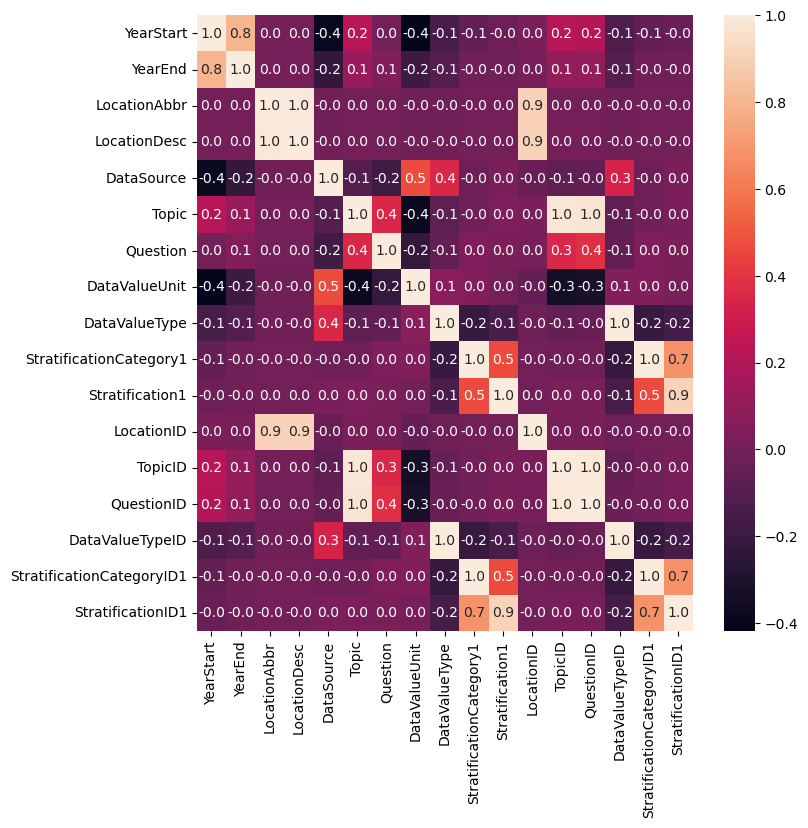

In [37]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,fmt='.1f',annot=True)

<Axes: >

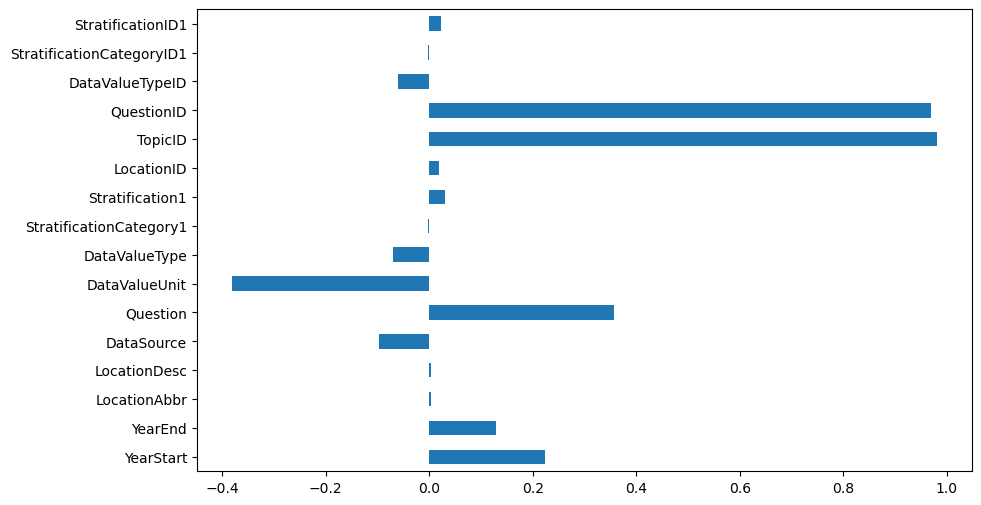

In [38]:
correlation_values = df.drop('Geolocation',axis=1).corr()['Topic'].drop('Topic')
correlation_values.plot(kind='barh', figsize=(10, 6))

In [39]:
i = 0
for column in df.drop('Geolocation',axis=1).columns: 
    if ((correlation[column] <= 0 ).sum()) > 7 : 
        i = i+1
        print(i,column,df[column].dtype,(correlation[column] <= 0 ).sum())
print('\nTotal Features : ', i)

1 YearStart int64 8
2 YearEnd int64 8
3 DataSource int32 11
4 DataValueUnit int32 9
5 DataValueType int32 13
6 StratificationCategory1 int32 11
7 DataValueTypeID int32 13
8 StratificationCategoryID1 int32 11

Total Features :  8


In [40]:
df.drop(['DataValueTypeID','DataValueType'],axis=1,inplace=True)

In [41]:
i = 0
for column in df.drop('Geolocation',axis=1).columns: 
    if ((correlation[column] <= 0 ).sum()) > 7 : 
        i = i+1
        print(i,column,df[column].dtype,(correlation[column] <= 0 ).sum())
print('\nTotal Features : ', i)

1 YearStart int64 8
2 YearEnd int64 8
3 DataSource int32 11
4 DataValueUnit int32 9
5 StratificationCategory1 int32 11
6 StratificationCategoryID1 int32 11

Total Features :  6


In [42]:
df.drop(['StratificationCategory1','StratificationCategoryID1'],axis=1,inplace=True)

In [43]:
i = 0
for column in df.drop('Geolocation',axis=1).columns: 
    if ((correlation[column] <= 0 ).sum()) > 7 : 
        i = i+1
        print(i,column,df[column].dtype,(correlation[column] <= 0 ).sum())
print('\nTotal Features : ', i)

1 YearStart int64 8
2 YearEnd int64 8
3 DataSource int32 11
4 DataValueUnit int32 9

Total Features :  4


In [44]:
correlation = df.drop('Geolocation',axis=1).corr()
correlation

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,Stratification1,LocationID,TopicID,QuestionID,StratificationID1
YearStart,1.000000,0.796326,0.004484,0.004416,-0.387238,0.224556,0.001491,-0.418625,-0.015469,0.023236,0.227129,0.218317,-0.034899
YearEnd,0.796326,1.000000,0.003253,0.003131,-0.227580,0.129556,0.051639,-0.192345,-0.004520,0.014711,0.103850,0.102779,-0.009106
LocationAbbr,0.004484,0.003253,1.000000,0.994343,-0.005240,0.003662,0.002202,-0.008089,0.000131,0.901572,0.003092,0.002729,-0.000096
LocationDesc,0.004416,0.003131,0.994343,1.000000,-0.005123,0.003757,0.002239,-0.008139,0.000142,0.906442,0.003182,0.002825,-0.000097
DataSource,-0.387238,-0.227580,-0.005240,-0.005123,1.000000,-0.097980,-0.175622,0.469376,0.023465,-0.031274,-0.066530,-0.049028,0.024176
Topic,0.224556,0.129556,0.003662,0.003757,-0.097980,1.000000,0.357075,-0.380966,0.030707,0.019539,0.980388,0.970194,0.021844
Question,0.001491,0.051639,0.002202,0.002239,-0.175622,0.357075,1.000000,-0.219999,0.025588,0.011636,0.346149,0.383869,0.029349
DataValueUnit,-0.418625,-0.192345,-0.008089,-0.008139,0.469376,-0.380966,-0.219999,1.000000,0.000390,-0.044895,-0.345716,-0.321491,0.018688
Stratification1,-0.015469,-0.004520,0.000131,0.000142,0.023465,0.030707,0.025588,0.000390,1.000000,0.000600,0.026506,0.026154,0.906675
LocationID,0.023236,0.014711,0.901572,0.906442,-0.031274,0.019539,0.011636,-0.044895,0.000600,1.000000,0.016502,0.014357,-0.000487


<Axes: >

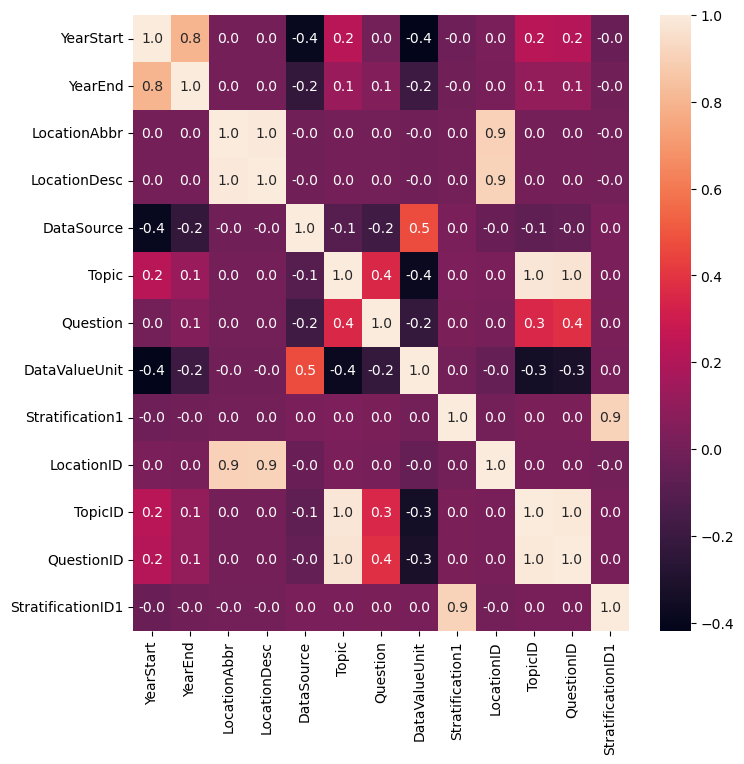

In [45]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,fmt='.1f',annot=True)

<Axes: >

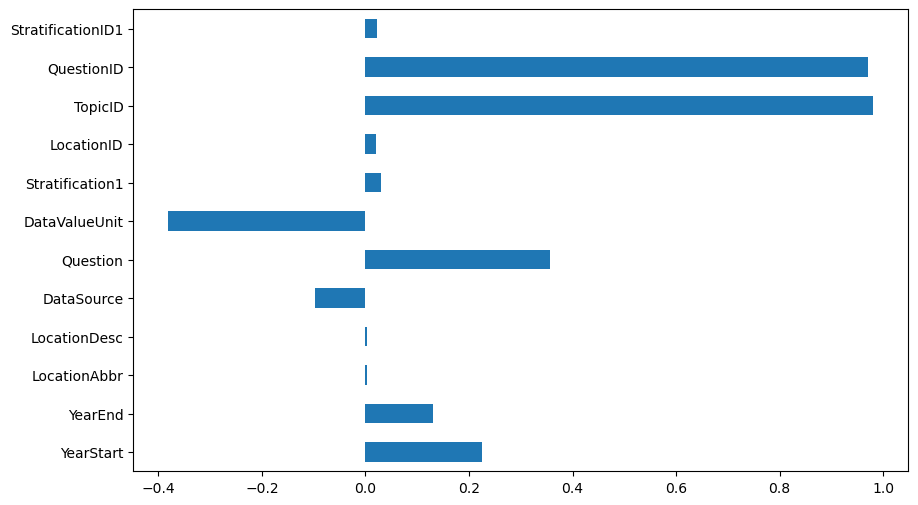

In [46]:
correlation_values = df.drop('Geolocation',axis=1).corr()['Topic'].drop('Topic')
correlation_values.plot(kind='barh', figsize=(10, 6))

In [47]:
df.shape

(303452, 14)

In [48]:
df.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource',
       'Topic', 'Question', 'DataValueUnit', 'Stratification1', 'Geolocation',
       'LocationID', 'TopicID', 'QuestionID', 'StratificationID1'],
      dtype='object')

# Splitiing Data

In [49]:
X = df.drop(['Topic','Geolocation'],axis=1)
y = df['Topic']

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print('Size of X_train : ', X_train.shape)
print('Size of y_train : ', y_train.shape)
print('Size of X_test : ', X_test.shape)
print('Size of y_test : ', y_test.shape)

Size of X_train :  (242761, 12)
Size of y_train :  (242761,)
Size of X_test :  (60691, 12)
Size of y_test :  (60691,)


## Random Forest Classifier

In [51]:
rfc = RandomForestClassifier(n_estimators=100,random_state=10)
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=10)

### Training

In [52]:
training_pred = rfc.predict(X_train)
training_pred

array([ 0, 17, 11, ...,  4, 17,  6])

In [53]:
accuracy = accuracy_score(y_train,training_pred)
print(accuracy)

1.0


In [54]:
cm = confusion_matrix(y_train,training_pred)
print(cm)

[[19783     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]
 [    0 14656     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]
 [    0     0  8245     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]
 [    0     0     0 17573     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]
 [    0     0     0     0 24059     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]
 [    0     0     0     0     0    81     0     0     0     0     0     0
      0     0     0     0     0     0     0]
 [    0     0     0     0     0     0 21182     0     0     0     0     0
      0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0  7818     0     0     0     0
      0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     

In [55]:
df['Topic'].value_counts()

Topic
4     30132
6     26442
14    25574
10    25146
0     24854
3     21936
11    18792
17    18666
1     18306
8     16986
13    16662
18    15636
15    12990
2     10314
7      9724
16     5220
9      4968
12     1002
5       102
Name: count, dtype: int64

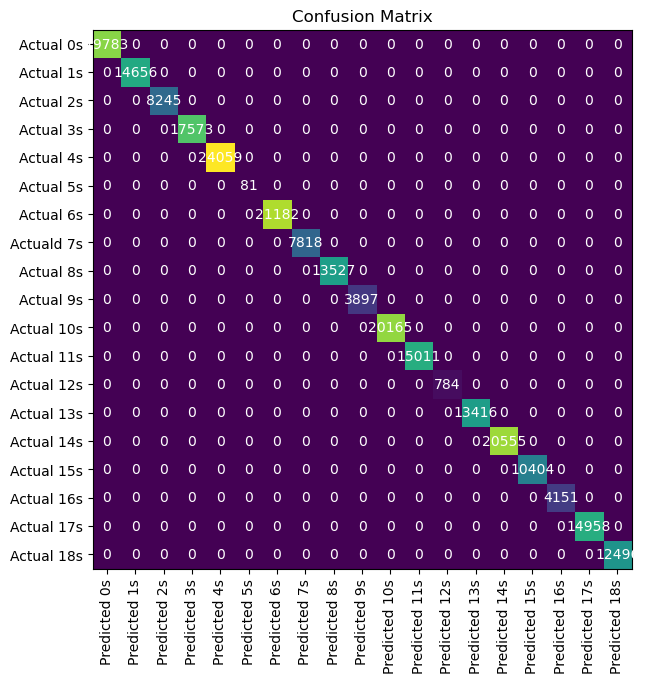

In [56]:
fig,ax = plt.subplots(figsize=(7,7))
ax.set(title= "Confusion Matrix")
ax.imshow(cm)
ax.xaxis.set(ticks=(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18),ticklabels=('Predicted 0s','Predicted 1s','Predicted 2s','Predicted 3s',
                                                                                   'Predicted 4s','Predicted 5s','Predicted 6s','Predicted 7s',
                                                                                   'Predicted 8s','Predicted 9s','Predicted 10s',
                                                                                   'Predicted 11s','Predicted 12s','Predicted 13s','Predicted 14s',
                                                                                   'Predicted 15s','Predicted 16s', 'Predicted 17s','Predicted 18s',))
ax.yaxis.set(ticks=(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18),ticklabels=('Actual 0s','Actual 1s','Actual 2s','Actual 3s',
                                                                                   'Actual 4s','Actual 5s','Actual 6s','Actuald 7s',
                                                                                   'Actual 8s','Actual 9s','Actual 10s',
                                                                                   'Actual 11s','Actual 12s','Actual 13s','Actual 14s',
                                                                                   'Actual 15s','Actual 16s', 'Actual 17s','Actual 18s',))
for i in range(19): 
    for j in range(19):
        ax.text(j,i,cm[i,j],ha='center',va='center',color='white')
plt.xticks(rotation=90)
plt.show()

In [57]:
report = classification_report(y_train,training_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19783
           1       1.00      1.00      1.00     14656
           2       1.00      1.00      1.00      8245
           3       1.00      1.00      1.00     17573
           4       1.00      1.00      1.00     24059
           5       1.00      1.00      1.00        81
           6       1.00      1.00      1.00     21182
           7       1.00      1.00      1.00      7818
           8       1.00      1.00      1.00     13527
           9       1.00      1.00      1.00      3897
          10       1.00      1.00      1.00     20165
          11       1.00      1.00      1.00     15011
          12       1.00      1.00      1.00       784
          13       1.00      1.00      1.00     13416
          14       1.00      1.00      1.00     20555
          15       1.00      1.00      1.00     10404
          16       1.00      1.00      1.00      4151
          17       1.00    

### Testing

In [58]:
y_pred = rfc.predict(X_test)
y_pred

array([ 4, 14, 10, ...,  0, 10,  6])

In [59]:
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

1.0


In [60]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[5071    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   0 3650    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   0    0 2069    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   0    0    0 4363    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   0    0    0    0 6073    0    0    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   0    0    0    0    0   21    0    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   0    0    0    0    0    0 5260    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   0    0    0    0    0    0    0 1906    0    0    0    0    0    0
     0    0    0    0    0]
 [   0    0    0    0    0    0    0    0 3459    0    0    0    0    0
     0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0 1071    0    0    0    0
     0    0    0    0    0]


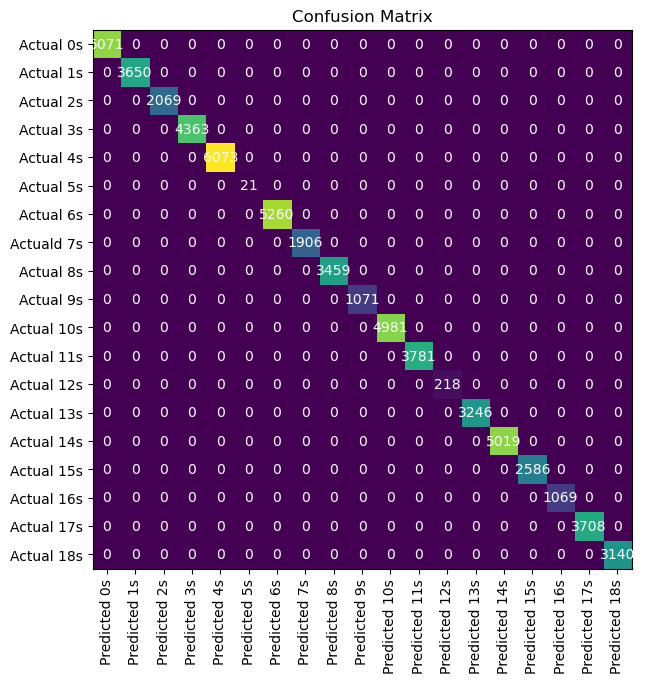

In [61]:
fig,ax = plt.subplots(figsize=(7,7))
ax.set(title= "Confusion Matrix")
ax.imshow(cm)
ax.xaxis.set(ticks=(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18),ticklabels=('Predicted 0s','Predicted 1s','Predicted 2s','Predicted 3s',
                                                                                   'Predicted 4s','Predicted 5s','Predicted 6s','Predicted 7s',
                                                                                   'Predicted 8s','Predicted 9s','Predicted 10s',
                                                                                   'Predicted 11s','Predicted 12s','Predicted 13s','Predicted 14s',
                                                                                   'Predicted 15s','Predicted 16s', 'Predicted 17s','Predicted 18s',))
ax.yaxis.set(ticks=(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18),ticklabels=('Actual 0s','Actual 1s','Actual 2s','Actual 3s',
                                                                                   'Actual 4s','Actual 5s','Actual 6s','Actuald 7s',
                                                                                   'Actual 8s','Actual 9s','Actual 10s',
                                                                                   'Actual 11s','Actual 12s','Actual 13s','Actual 14s',
                                                                                   'Actual 15s','Actual 16s', 'Actual 17s','Actual 18s',))
for i in range(19): 
    for j in range(19):
        ax.text(j,i,cm[i,j],ha='center',va='center',color='white')
plt.xticks(rotation=90)
plt.show()

In [62]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5071
           1       1.00      1.00      1.00      3650
           2       1.00      1.00      1.00      2069
           3       1.00      1.00      1.00      4363
           4       1.00      1.00      1.00      6073
           5       1.00      1.00      1.00        21
           6       1.00      1.00      1.00      5260
           7       1.00      1.00      1.00      1906
           8       1.00      1.00      1.00      3459
           9       1.00      1.00      1.00      1071
          10       1.00      1.00      1.00      4981
          11       1.00      1.00      1.00      3781
          12       1.00      1.00      1.00       218
          13       1.00      1.00      1.00      3246
          14       1.00      1.00      1.00      5019
          15       1.00      1.00      1.00      2586
          16       1.00      1.00      1.00      1069
          17       1.00    

## XGBoost Classifier

In [63]:
xgb = XGBClassifier(n_estimators=100,random_state=25)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [64]:
training_pred = xgb.predict(X_train)
training_pred

array([ 0, 17, 11, ...,  4, 17,  6], dtype=int64)

In [65]:
accuracy = accuracy_score(y_train,training_pred)
print(accuracy)

1.0


In [66]:
cm = confusion_matrix(y_train,training_pred)

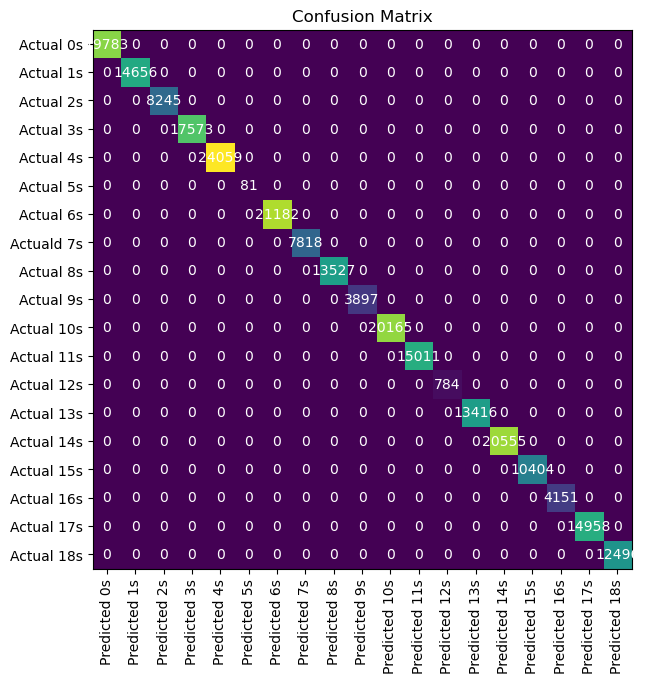

In [67]:
fig,ax = plt.subplots(figsize=(7,7))
ax.set(title= "Confusion Matrix")
ax.imshow(cm)
ax.xaxis.set(ticks=(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18),ticklabels=('Predicted 0s','Predicted 1s','Predicted 2s','Predicted 3s',
                                                                                   'Predicted 4s','Predicted 5s','Predicted 6s','Predicted 7s',
                                                                                   'Predicted 8s','Predicted 9s','Predicted 10s',
                                                                                   'Predicted 11s','Predicted 12s','Predicted 13s','Predicted 14s',
                                                                                   'Predicted 15s','Predicted 16s', 'Predicted 17s','Predicted 18s',))
ax.yaxis.set(ticks=(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18),ticklabels=('Actual 0s','Actual 1s','Actual 2s','Actual 3s',
                                                                                   'Actual 4s','Actual 5s','Actual 6s','Actuald 7s',
                                                                                   'Actual 8s','Actual 9s','Actual 10s',
                                                                                   'Actual 11s','Actual 12s','Actual 13s','Actual 14s',
                                                                                   'Actual 15s','Actual 16s', 'Actual 17s','Actual 18s',))
for i in range(19): 
    for j in range(19):
        ax.text(j,i,cm[i,j],ha='center',va='center',color='white')
plt.xticks(rotation=90)
plt.show()

In [68]:
report = classification_report(y_train,training_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19783
           1       1.00      1.00      1.00     14656
           2       1.00      1.00      1.00      8245
           3       1.00      1.00      1.00     17573
           4       1.00      1.00      1.00     24059
           5       1.00      1.00      1.00        81
           6       1.00      1.00      1.00     21182
           7       1.00      1.00      1.00      7818
           8       1.00      1.00      1.00     13527
           9       1.00      1.00      1.00      3897
          10       1.00      1.00      1.00     20165
          11       1.00      1.00      1.00     15011
          12       1.00      1.00      1.00       784
          13       1.00      1.00      1.00     13416
          14       1.00      1.00      1.00     20555
          15       1.00      1.00      1.00     10404
          16       1.00      1.00      1.00      4151
          17       1.00    

### Testing

In [69]:
y_pred = xgb.predict(X_test)
y_pred

array([ 4, 14, 10, ...,  0, 10,  6], dtype=int64)

In [70]:
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

1.0


In [71]:
cm = confusion_matrix(y_test,y_pred)

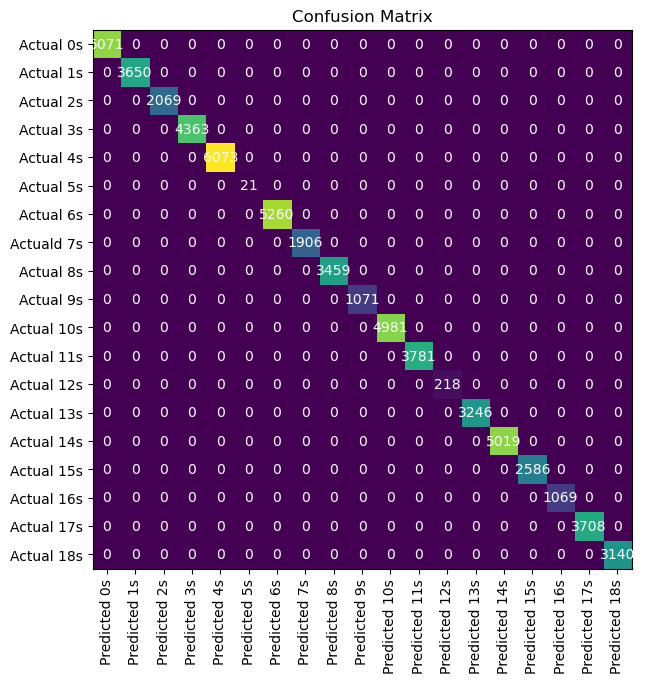

In [72]:
fig,ax = plt.subplots(figsize=(7,7))
ax.set(title= "Confusion Matrix")
ax.imshow(cm)
ax.xaxis.set(ticks=(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18),ticklabels=('Predicted 0s','Predicted 1s','Predicted 2s','Predicted 3s',
                                                                                   'Predicted 4s','Predicted 5s','Predicted 6s','Predicted 7s',
                                                                                   'Predicted 8s','Predicted 9s','Predicted 10s',
                                                                                   'Predicted 11s','Predicted 12s','Predicted 13s','Predicted 14s',
                                                                                   'Predicted 15s','Predicted 16s', 'Predicted 17s','Predicted 18s',))
ax.yaxis.set(ticks=(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18),ticklabels=('Actual 0s','Actual 1s','Actual 2s','Actual 3s',
                                                                                   'Actual 4s','Actual 5s','Actual 6s','Actuald 7s',
                                                                                   'Actual 8s','Actual 9s','Actual 10s',
                                                                                   'Actual 11s','Actual 12s','Actual 13s','Actual 14s',
                                                                                   'Actual 15s','Actual 16s', 'Actual 17s','Actual 18s',))
for i in range(19): 
    for j in range(19):
        ax.text(j,i,cm[i,j],ha='center',va='center',color='white')
plt.xticks(rotation=90)
plt.show()

In [73]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5071
           1       1.00      1.00      1.00      3650
           2       1.00      1.00      1.00      2069
           3       1.00      1.00      1.00      4363
           4       1.00      1.00      1.00      6073
           5       1.00      1.00      1.00        21
           6       1.00      1.00      1.00      5260
           7       1.00      1.00      1.00      1906
           8       1.00      1.00      1.00      3459
           9       1.00      1.00      1.00      1071
          10       1.00      1.00      1.00      4981
          11       1.00      1.00      1.00      3781
          12       1.00      1.00      1.00       218
          13       1.00      1.00      1.00      3246
          14       1.00      1.00      1.00      5019
          15       1.00      1.00      1.00      2586
          16       1.00      1.00      1.00      1069
          17       1.00    